In [23]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
ds = {
    "era5": xr.open_dataset(
        "data/ERA5_tmp_0.25deg_monthly_198001-202312.nc", decode_times=False
    ),
    "lwe": xr.open_dataset("data/LWE_complete_1984_2025.nc"),
    "fcti": xr.open_dataset("data/Fcti_resampled_to_0.25deg.nc"),
    "giems": xr.open_dataset("data/GIEMS-MC.nc", decode_times=False),
    "gleam": xr.open_dataset(
        "data/GLEAM4_sm_0.25deg_monthly_198001-202312.nc", decode_times=False
    ),
    "pre": xr.open_dataset(
        "data/MSWEP_pre_0.25deg_monthly_198001-202312.nc", decode_times=False
    ),
    "area": xr.open_dataset("data/pixel_area.nc"),
    "mask": xr.open_dataset("data/Land_mask.nc"),
}

# Assign correct timestamp

In [29]:
time_era5 = pd.date_range("1980-01-01", "2023-12-31", freq="MS")
ds["era5"] = ds["era5"].assign_coords(time=time_era5)
ds["era5"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    tmp      (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

In [30]:
time_giems = pd.date_range("1992-01-01", periods=ds["giems"].sizes["time"], freq="MS")
ds["giems"] = ds["giems"].assign_coords(time=time_giems)
ds["giems"]

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 348, lat: 720, lon: 1440)
Coordinates:
  * time        (time) datetime64[ns] 3kB 1992-01-01 1992-02-01 ... 2020-12-01
  * lat         (lat) float64 6kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon         (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    train_fwet  (time, lat, lon) float64 3GB ...

In [31]:
time_pre = pd.date_range("1980-01-01", "2023-12-31", freq="MS")
ds["pre"] = ds["pre"].assign_coords(time=time_pre)
ds["pre"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    pre      (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

In [44]:
time_gleam = pd.date_range("1980-01-01", "2023-12-31", freq="MS")
ds["gleam"] = ds["gleam"].assign_coords(time=time_gleam)
ds["gleam"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    sm       (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

# Fix units and variable names

In [32]:
ds["era5"]["tmp"].attrs["units"] = "K"
ds["area"]["pixel area"].attrs["units"] = "m2"
ds["pre"]["pre"].attrs["units"] = "mm/month mean"

In [33]:
# use new name area
ds["area"] = ds["area"].rename({"pixel area": "area"})

In [49]:
ds["giems"] = ds["giems"].rename({"train_fwet": "fwet"})

# Assign perfect spatial coordinates

## area

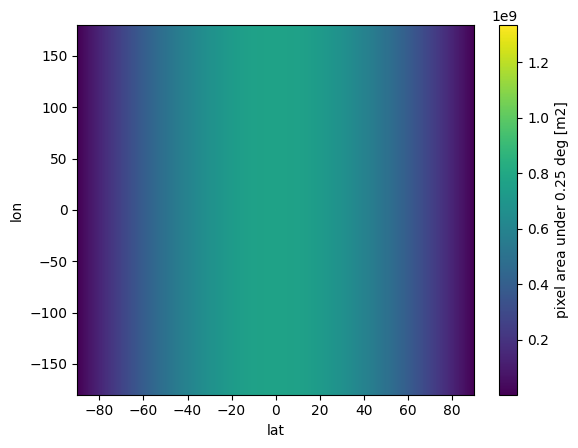

In [34]:
ds["area"]["area"].plot()

In [35]:
ds["area"] = ds["area"]["area"].transpose("lat", "lon")
ds["area"]

<xarray.DataArray 'area' (lat: 720, lon: 1440)> Size: 8MB
[1036800 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    long_name:     pixel area under 0.25 deg
    generated_by:  Yifan Cheng
    units:         m2

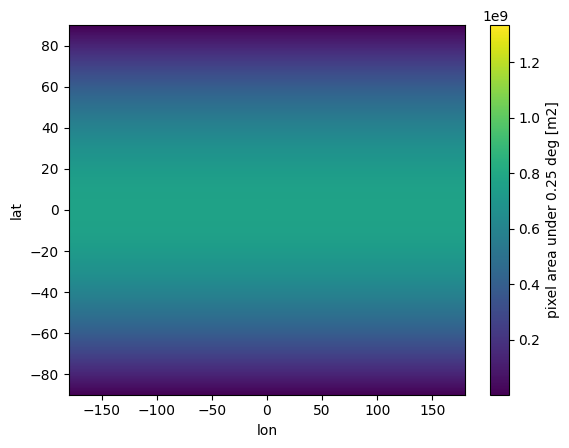

In [36]:
ds["area"].plot()

## pre

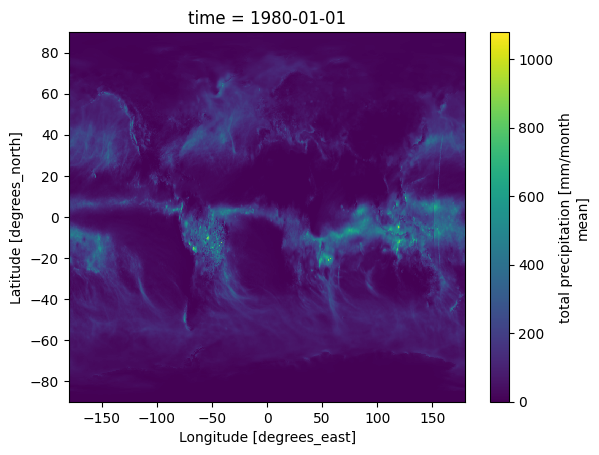

In [38]:
ds["pre"]["pre"].isel(time=0).plot()

In [39]:
ds["pre"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    pre      (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

## ear5

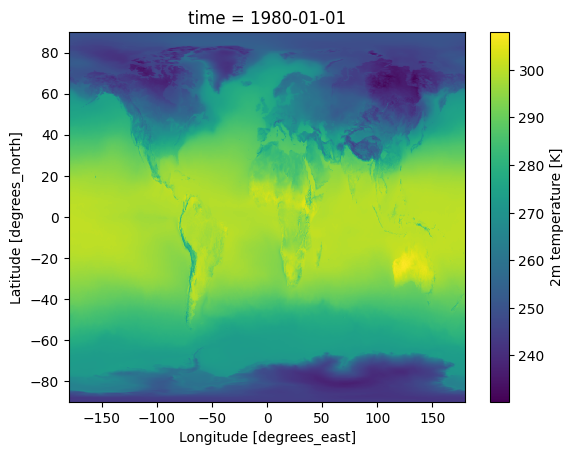

In [40]:
ds["era5"]["tmp"].isel(time=0).plot()

In [41]:
ds["era5"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    tmp      (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

## sm

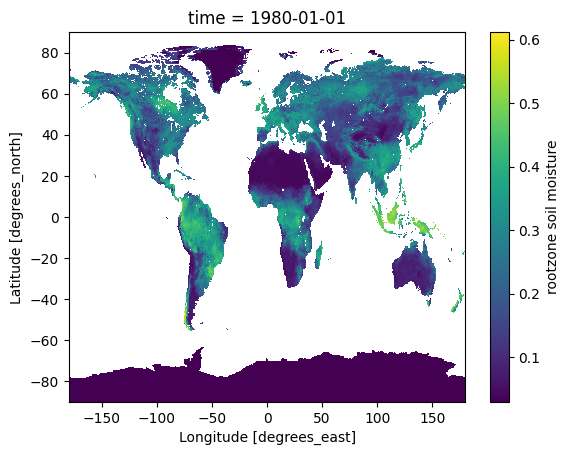

In [45]:
ds["gleam"]["sm"].isel(time=0).plot()

In [46]:
ds["gleam"]

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    sm       (time, lat, lon) float32 2GB ...
Attributes:
    source:   Generated by BogangDong

## fcti

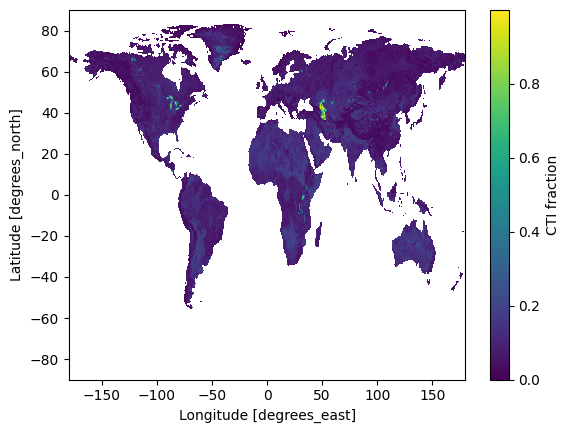

In [47]:
ds["fcti"]["fcti"].plot()

In [48]:
ds["fcti"]

<xarray.Dataset> Size: 8MB
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    fcti     (lat, lon) float64 8MB ...
Attributes:
    source:   Generated by BogangDong

## giems

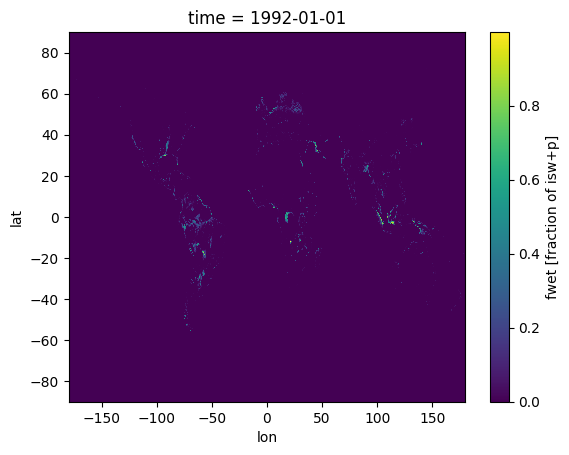

In [50]:
ds["giems"]["fwet"].isel(time=0).plot()

In [51]:
ds["giems"]

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 348, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1992-01-01 1992-02-01 ... 2020-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    fwet     (time, lat, lon) float64 3GB ...

## lwe

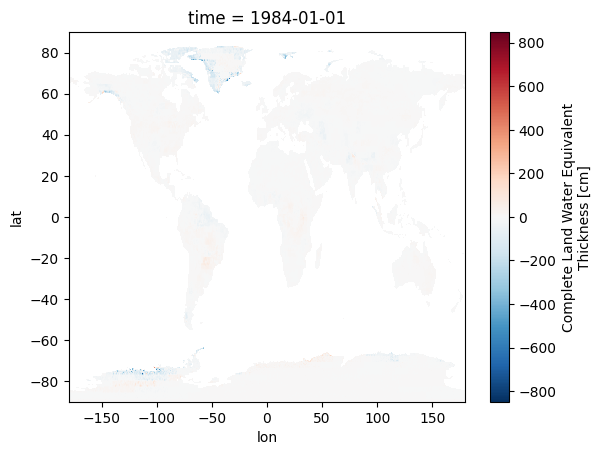

In [57]:
ds["lwe"]["lwe_thickness"].isel(time=0).plot()

In [58]:
ds["lwe"]

<xarray.Dataset> Size: 2GB
Dimensions:        (time: 500, lat: 720, lon: 1440)
Coordinates:
  * time           (time) datetime64[ns] 4kB 1984-01-01 ... 2025-08-01
  * lat            (lat) float64 6kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon            (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    lwe_thickness  (time, lat, lon) float32 2GB ...

In [60]:
# flip latitudes in lwe
ds["lwe"] = ds["lwe"].sortby("lat", ascending=True)
ds["lwe"]

<xarray.Dataset> Size: 2GB
Dimensions:        (time: 500, lat: 720, lon: 1440)
Coordinates:
  * time           (time) datetime64[ns] 4kB 1984-01-01 ... 2025-08-01
  * lat            (lat) float64 6kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon            (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    lwe_thickness  (time, lat, lon) float32 2GB ...

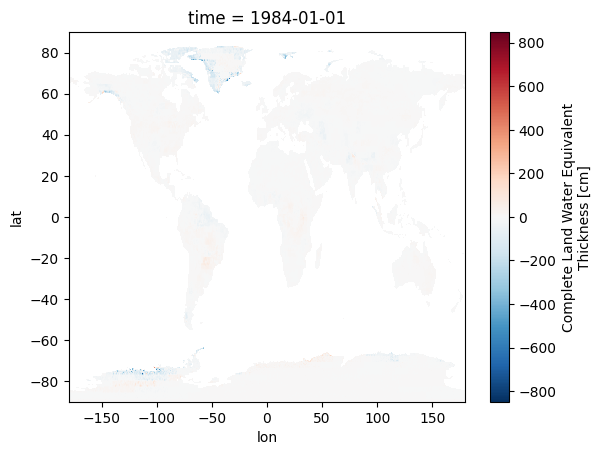

In [61]:
ds["lwe"]["lwe_thickness"].isel(time=0).plot()

# Make GIEMS Mask

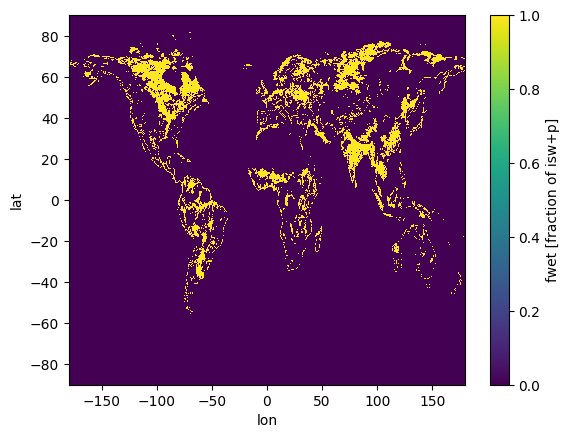

In [54]:
# if a grid cell has fwet > 0.0003 in any time step, mark it as wetland (1), else non-wetland (0)
giems_mask = (ds["giems"]["fwet"] > 0.0003).any(dim="time").astype(bool)
giems_mask.plot()

In [56]:
# save as giems mask
giems_mask.attrs["units"] = (
    "Whether the grid cell is wetland (True) or non-wetland (False) according to GIEMS-MC data"
)
giems_mask.name = "mask"
giems_mask.to_netcdf("data/wetland_mask.nc")

# Export all the cleaned datasets

In [62]:
ds["area"].to_netcdf("data/clean/PixelArea_area.nc")
ds["era5"].to_netcdf("data/clean/ERA5_tmp.nc")
ds["fcti"].to_netcdf("data/clean/fcti.nc")
ds["gleam"].to_netcdf("data/clean/GLEAM4a_sm.nc")
ds["pre"].to_netcdf("data/clean/MSWEP_pre.nc")
ds["lwe"].to_netcdf("data/clean/GRACE_lwe_thickness.nc")
ds["giems"].to_netcdf("data/clean/GIEMS-MC_fwet.nc")